<a href="https://colab.research.google.com/github/Badrish26/Pothole-Detection/blob/main/POTHOLE_DETECTION__1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

zip_file_path = '/content/archive (3).zip'
extract_dir = 'pothole_images' # Directory to extract files into

# Extract the contents of the zip file
try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Successfully extracted contents to '{extract_dir}'")

    # List the files inside the extracted directory
    print(f"\nFiles in '{extract_dir}':")
    for root, dirs, files in os.walk(extract_dir):
        for name in files:
            print(os.path.join(root, name))
        for name in dirs:
            print(os.path.join(root, name))

except FileNotFoundError:
    print(f"Error: The file '{zip_file_path}' was not found.")
except zipfile.BadZipFile:
    print(f"Error: The file '{zip_file_path}' is not a valid zip file.")
except Exception as e:
    print(f"An error occurred: {e}")

Error: The file '/content/archive (3).zip' is not a valid zip file.


In [ ]:
pip install lxml tqdm


In [ ]:
import os
import xml.etree.ElementTree as ET
from tqdm import tqdm

# Paths
image_dir = 'pothole_images/images'
annotation_dir = 'pothole_images/annotations'
output_image_dir = 'dataset/images/train'
output_label_dir = 'dataset/labels/train'

os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_label_dir, exist_ok=True)

# Class mapping
class_map = {'pothole': 0}

def convert(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    image_name = root.find('filename').text
    img_path = os.path.join(image_dir, image_name)

    size = root.find('size')
    w = int(size.find('width').text)
    h = int(size.find('height').text)

    yolo_labels = []

    for obj in root.iter('object'):
        cls = obj.find('name').text
        if cls not in class_map:
            continue
        cls_id = class_map[cls]

        xml_box = obj.find('bndbox')
        xmin = int(xml_box.find('xmin').text)
        xmax = int(xml_box.find('xmax').text)
        ymin = int(xml_box.find('ymin').text)
        ymax = int(xml_box.find('ymax').text)

        # Convert to YOLO format
        x_center = ((xmin + xmax) / 2) / w
        y_center = ((ymin + ymax) / 2) / h
        width = (xmax - xmin) / w
        height = (ymax - ymin) / h

        yolo_labels.append(f"{cls_id} {x_center} {y_center} {width} {height}")

    # Save label
    label_path = os.path.join(output_label_dir, image_name.replace(".jpg", ".txt").replace(".png", ".txt"))
    with open(label_path, 'w') as f:
        f.write('\n'.join(yolo_labels))

    # Copy image
    os.system(f"cp '{img_path}' '{output_image_dir}'")

# Process all annotations
xml_files = [f for f in os.listdir(annotation_dir) if f.endswith('.xml')]
for xml in tqdm(xml_files):
    convert(os.path.join(annotation_dir, xml))


100%|██████████| 665/665 [00:02<00:00, 236.90it/s]


In [ ]:
!pip install ultralytics



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
from ultralytics import YOLO
import os
import shutil

# Setup paths
original_images = 'pothole_images/images'
original_labels = 'pothole_images/annotations'

dataset_path = 'dataset'
image_train = os.path.join(dataset_path, 'images/train')
label_train = os.path.join(dataset_path, 'labels/train')

# Create folders
os.makedirs(image_train, exist_ok=True)
os.makedirs(label_train, exist_ok=True)

# Copy all images
for file in os.listdir(original_images):
    if file.endswith(('.jpg', '.png', '.jpeg')):
        shutil.copy(os.path.join(original_images, file), image_train)

# Copy all labels
for file in os.listdir(original_labels):
    if file.endswith('.txt'):
        shutil.copy(os.path.join(original_labels, file), label_train)

# Create data.yaml
with open('data.yaml', 'w') as f:
    f.write(f"""
path: {dataset_path}
train: images/train
val: images/train

nc: 1
names: ['pothole']
""")

# Train YOLOv8
model = YOLO('yolov8n.pt')  # You can switch to yolov8s.pt, yolov8m.pt etc.
model.train(data='data.yaml', epochs=30, imgsz=640)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 170MB/s]


Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fals

100%|██████████| 755k/755k [00:00<00:00, 37.8MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 120MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2187.5±1528.0 MB/s, size: 377.0 KB)


train: Scanning /content/dataset/labels/train... 665 images, 0 backgrounds, 0 corrupt: 100%|██████████| 665/665 [00:01<00:00, 544.47it/s]

train: New cache created: /content/dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1552.5±990.0 MB/s, size: 493.0 KB)


val: Scanning /content/dataset/labels/train.cache... 665 images, 0 backgrounds, 0 corrupt: 100%|██████████| 665/665 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.12G      1.608       2.51      1.498         42        640: 100%|██████████| 42/42 [00:21<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:13<00:00,  1.54it/s]


                   all        665       1740      0.901     0.0682      0.301      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.85G      1.538       1.93      1.451         33        640: 100%|██████████| 42/42 [00:16<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.91it/s]


                   all        665       1740      0.397      0.383      0.325       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.85G      1.575      1.792       1.47         27        640: 100%|██████████| 42/42 [00:16<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.90it/s]


                   all        665       1740      0.546      0.462       0.49       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.85G      1.556       1.71       1.44         53        640: 100%|██████████| 42/42 [00:17<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.94it/s]


                   all        665       1740      0.574      0.545      0.579       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.85G      1.513      1.585      1.418         55        640: 100%|██████████| 42/42 [00:16<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.86it/s]

                   all        665       1740      0.607      0.455      0.511      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.85G      1.503      1.526      1.413         31        640: 100%|██████████| 42/42 [00:16<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]


                   all        665       1740      0.641      0.556      0.613      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.85G      1.464       1.47      1.391         33        640: 100%|██████████| 42/42 [00:16<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]


                   all        665       1740      0.692      0.606      0.674       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.85G       1.48      1.395      1.366         43        640: 100%|██████████| 42/42 [00:16<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.86it/s]


                   all        665       1740      0.732      0.656      0.729      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.85G      1.431      1.377      1.375         24        640: 100%|██████████| 42/42 [00:16<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]

                   all        665       1740      0.733      0.673      0.741       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.86G      1.417      1.332      1.363         58        640: 100%|██████████| 42/42 [00:17<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.03it/s]


                   all        665       1740      0.719      0.668      0.734      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.86G      1.356      1.282      1.307         41        640: 100%|██████████| 42/42 [00:17<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.95it/s]

                   all        665       1740      0.659      0.588      0.638      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.87G      1.342      1.238      1.314         50        640: 100%|██████████| 42/42 [00:16<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.86it/s]

                   all        665       1740       0.77      0.699      0.785      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.87G      1.335      1.215      1.294         47        640: 100%|██████████| 42/42 [00:16<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.88it/s]

                   all        665       1740      0.747      0.697      0.775      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.87G      1.315      1.171      1.278         28        640: 100%|██████████| 42/42 [00:15<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.85it/s]

                   all        665       1740       0.75      0.742      0.807      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.87G      1.296      1.181      1.285         20        640: 100%|██████████| 42/42 [00:16<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.87it/s]

                   all        665       1740      0.833      0.726       0.83      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.87G      1.277       1.13      1.255         34        640: 100%|██████████| 42/42 [00:15<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.85it/s]

                   all        665       1740      0.843      0.725      0.839      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.87G      1.279      1.122      1.254         36        640: 100%|██████████| 42/42 [00:15<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.89it/s]

                   all        665       1740      0.807       0.72      0.822       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.88G      1.237        1.1      1.248         26        640: 100%|██████████| 42/42 [00:16<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.86it/s]

                   all        665       1740      0.833       0.73      0.843      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.88G      1.228      1.091      1.238         37        640: 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.91it/s]

                   all        665       1740      0.825      0.771      0.861      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.88G       1.23      1.023      1.235         45        640: 100%|██████████| 42/42 [00:16<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.78it/s]

                   all        665       1740      0.858      0.782      0.883      0.612


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.88G      1.175      1.022      1.196         26        640: 100%|██████████| 42/42 [00:18<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.87it/s]

                   all        665       1740      0.855      0.776      0.879      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.88G      1.154     0.9883       1.18         18        640: 100%|██████████| 42/42 [00:16<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.79it/s]

                   all        665       1740      0.879      0.771      0.883      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.88G      1.118     0.9272      1.157         29        640: 100%|██████████| 42/42 [00:16<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.98it/s]

                   all        665       1740      0.866      0.797      0.891      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.89G      1.116      0.924      1.178         24        640: 100%|██████████| 42/42 [00:15<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.95it/s]

                   all        665       1740      0.889      0.777      0.897       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.89G      1.069     0.8753      1.142         15        640: 100%|██████████| 42/42 [00:16<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.10it/s]

                   all        665       1740      0.878      0.815      0.912      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.89G      1.066     0.8222      1.133         19        640: 100%|██████████| 42/42 [00:16<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.90it/s]

                   all        665       1740      0.903      0.833      0.927      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.89G      1.043     0.8224       1.13         16        640: 100%|██████████| 42/42 [00:16<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.00it/s]

                   all        665       1740       0.91      0.833      0.931      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.89G       1.02     0.7868      1.117         18        640: 100%|██████████| 42/42 [00:15<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.90it/s]

                   all        665       1740      0.907      0.845      0.937      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.89G      1.028     0.7854      1.102         21        640: 100%|██████████| 42/42 [00:15<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.93it/s]

                   all        665       1740      0.911      0.845      0.938      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.89G     0.9944     0.7488      1.098         23        640: 100%|██████████| 42/42 [00:14<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.92it/s]

                   all        665       1740      0.915      0.859      0.944      0.704



30 epochs completed in 0.237 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:12<00:00,  1.69it/s]


                   all        665       1740      0.915       0.86      0.944      0.704
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fd408b84f90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /content/dataset/images/train/potholes50.png: 640x640 1 pothole, 28.1ms
Speed: 4.1ms preprocess, 28.1ms inference, 8.9ms postprocess per image at shape (1, 3, 640, 640)
Pothole(s) detected in: potholes50.png


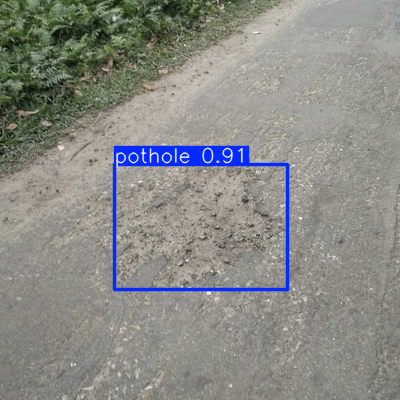

In [ ]:
import os
import random
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = YOLO("runs/detect/train/weights/best.pt")

# Pick a random image
image_dir = 'dataset/images/train'
image_list = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
random_image = random.choice(image_list)
image_path = os.path.join(image_dir, random_image)

# Run prediction
results = model(image_path)
boxes = results[0].boxes

# Show result
if boxes:
    print(f"Pothole(s) detected in: {random_image}")
    results[0].show()  # opens a window with boxes drawn
else:
    print(f"No pothole present in: {random_image}")
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title("No pothole present")
    plt.axis('off')
    plt.show()



image 1/1 /content/road.jpg: 384x640 31 potholes, 8.0ms
Speed: 2.9ms preprocess, 8.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
✅ Pothole(s) detected!


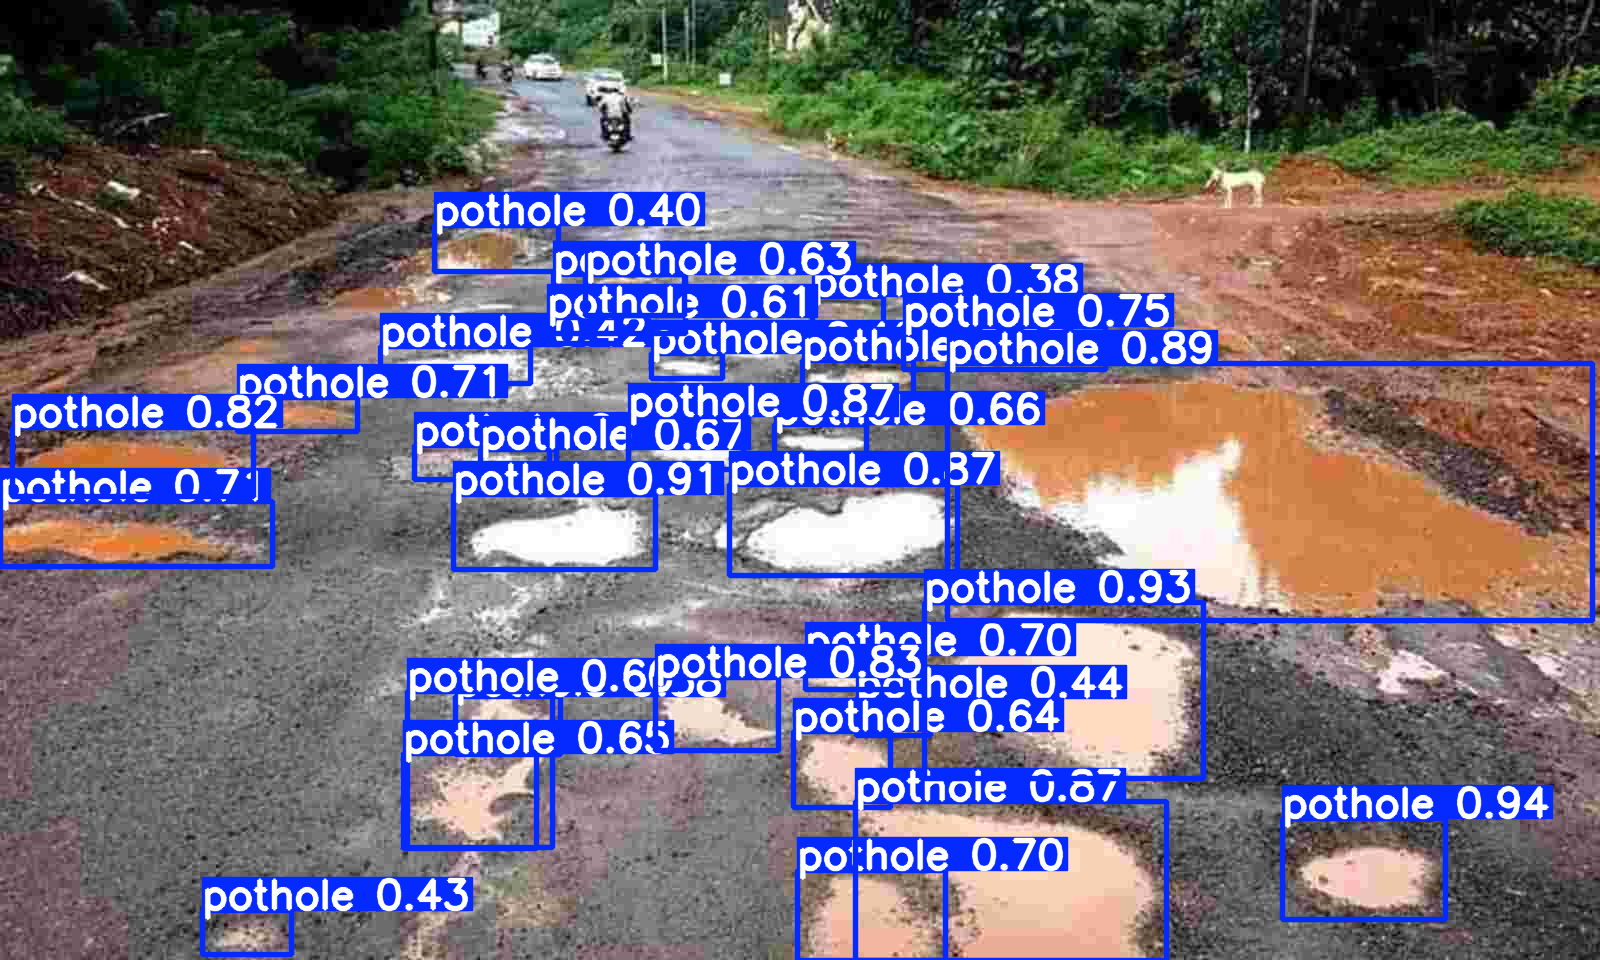

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load your trained YOLOv8 model
model = YOLO("runs/detect/train/weights/best.pt")  # Path to your trained model

# Path to the new image you want to test
input_image_path = "road.jpg"  # Change this to your custom image

# Check if file exists
if not os.path.exists(input_image_path):
    raise FileNotFoundError(f"Image '{input_image_path}' not found.")

# Run inference
results = model(input_image_path)
boxes = results[0].boxes

# Check if potholes detected
if boxes and len(boxes) > 0:
    print("✅ Pothole(s) detected!")
    results[0].show()  # This will show the image with bounding boxes
else:
    print("❌ No pothole present in the image.")
    img = Image.open(input_image_path)
    plt.imshow(img)
    plt.title("No pothole detected")
    plt.axis('off')
    plt.show()


In [ ]:
from ultralytics import YOLO
from IPython.display import Video, display

# Load your trained model
model = YOLO('best.pt')  # your model weights path

input_video = 'input_video.mp4'  # your input video file path
output_path = 'output_video.mp4'  # where output will be saved

# Run inference with save=True and specify output file name
results = model.predict(source=input_video, save=True, save_path='.')  # saves in current folder

# The saved video will be in runs/detect/predict folder by default
# Let's find the output video path
import os
output_folder = 'runs/detect/predict'
files = os.listdir(output_folder)
output_video_file = None
for f in files:
    if f.endswith('.mp4'):
        output_video_file = os.path.join(output_folder, f)
        break

print(f"Output video saved at: {output_video_file}")

# Display the video inline in Colab
display(Video(output_video_file, embed=True))
